In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Bangla Hate Speech Detection/dataset/final_dataset.xlsx")
df.columns

Index(['comment', 'withoutStopwordComment', 'Sentiment', 'category'], dtype='object')

In [4]:
def tokenizer(text):
    return text.split()

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=tokenizer)

x = tfidf.fit_transform(df.withoutStopwordComment.values.astype('U')) 
y = df.category.values
x.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2916, 5091)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)


In [ ]:
##### MulitnomialNB ######

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics

estimator = MultinomialNB()
print(estimator.get_params().keys())

dict_keys(['alpha', 'class_prior', 'fit_prior', 'force_alpha'])


In [7]:

parameters = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5]]
}

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(MultinomialNB(), parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the classifier on the test set
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters:  {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}
Best score:  0.9291234339571381
Accuracy:  0.9410150891632373


In [8]:

print("\n########## Multinomial NB algorithm ###########")
clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")




########## Multinomial NB algorithm ###########
test size=30, accuracy = 92.69 %
test size=40, accuracy = 92.63 %
test size=50, accuracy = 91.43 %
test size=60, accuracy = 91.71 %
test size=70, accuracy = 91.38 %


In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1009
           1       0.87      0.97      0.91      1033

    accuracy                           0.91      2042
   macro avg       0.91      0.91      0.91      2042
weighted avg       0.91      0.91      0.91      2042

Train Accuracy:  0.988558352402746
Test Accuracy:  0.9089128305582762


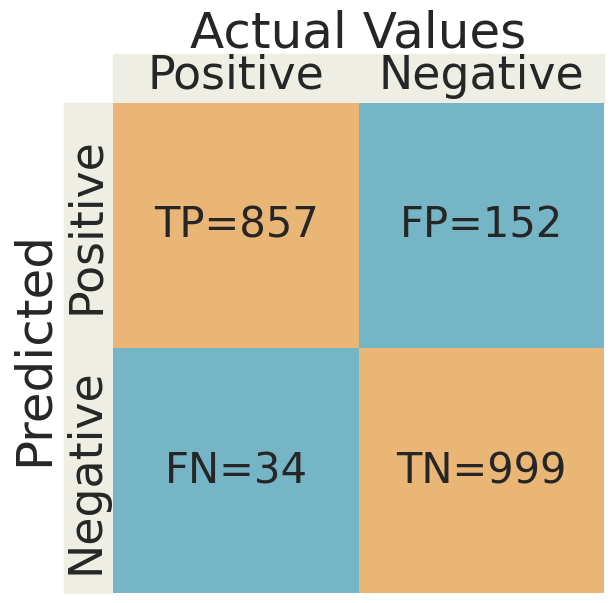

In [14]:
cf_matrix=confusion_matrix(y_test,pred)
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

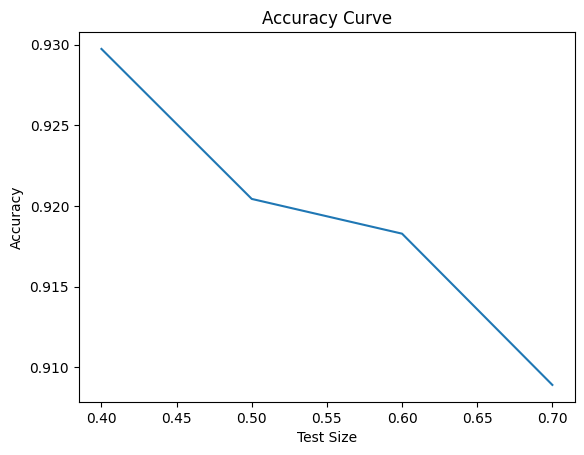

In [12]:
# Initialize lists to store test sizes and accuracies
test_sizes = [0.4, 0.5, 0.6, 0.7]
accuracies = []

# Iterate over different test sizes and calculate accuracies
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Initialize and fit the SVM classifier with the best hyperparameters
    clf = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
    clf.fit(X_train, y_train)

    # Predict the labels for the test set
    pred = clf.predict(X_test)

    # Calculate the accuracy score
    score = metrics.accuracy_score(y_test, pred)
    accuracies.append(score)

    # print("test size={:.0%}, accuracy = {:.2%}".format(test_size, score))

# Plot the accuracy curve
plt.plot(test_sizes, accuracies)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

######### KNN ############
estimator = KNeighborsClassifier()
print(estimator.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [16]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune and their possible values
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric':[ 'euclidean', 'manhattan', 'minkowski', 'cosine']}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.8603875205254516


In [17]:

print("\n########## KNN algorithm ###########")
clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")


########## KNN algorithm ###########
test size=30, accuracy = 89.71 %
test size=40, accuracy = 90.23 %
test size=50, accuracy = 87.93 %
test size=60, accuracy = 88.17 %
test size=70, accuracy = 85.65 %


In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,pred))
print("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train))) # compare training actual and predicted value
print("Test Accuracy: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      1009
           1       0.79      0.98      0.87      1033

    accuracy                           0.86      2042
   macro avg       0.88      0.86      0.85      2042
weighted avg       0.88      0.86      0.85      2042

Train Accuracy:  0.9988558352402745
Test Accuracy:  0.856513222331048


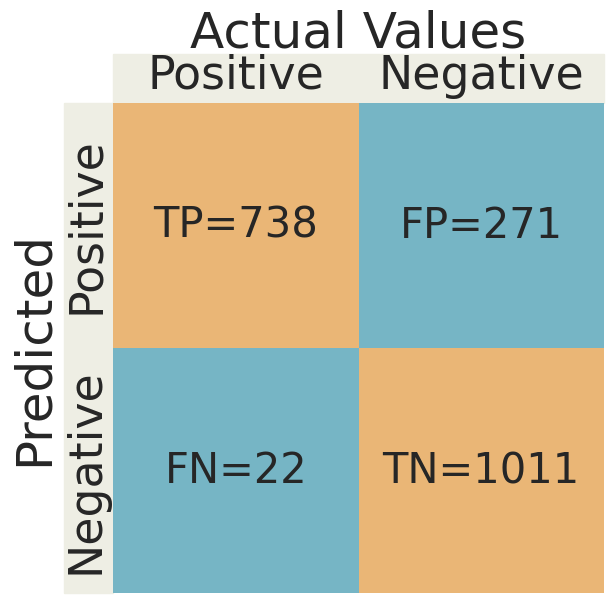

In [19]:
cf_matrix=confusion_matrix(y_test,pred)
cm = cf_matrix
sns.set(font_scale=3)
plt.figure(figsize=(7, 7))
ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
                 annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive', 'Negative'])
ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

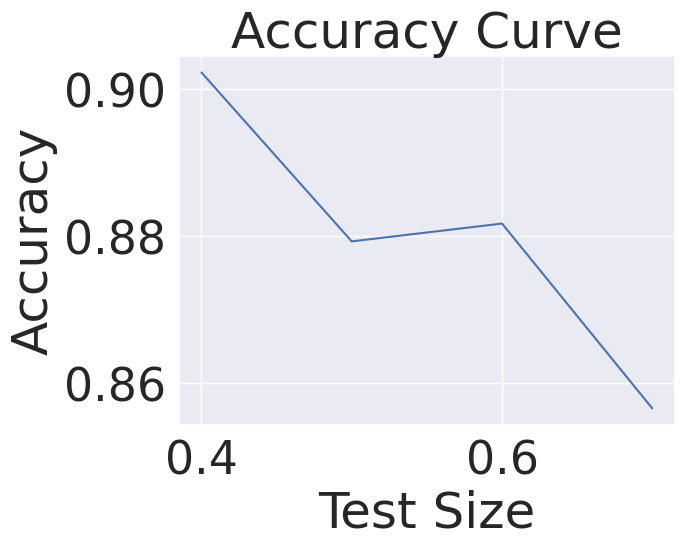

In [21]:
# Initialize lists to store test sizes and accuracies
test_sizes = [0.4, 0.5, 0.6, 0.7]
accuracies = []

# Iterate over different test sizes and calculate accuracies
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

    # Initialize and fit the SVM classifier with the best hyperparameters
    clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 9, weights='distance')
    clf.fit(X_train, y_train)

    # Predict the labels for the test set
    pred = clf.predict(X_test)

    # Calculate the accuracy score
    score = metrics.accuracy_score(y_test, pred)
    accuracies.append(score)

    # print("test size={:.0%}, accuracy = {:.2%}".format(test_size, score))

# Plot the accuracy curve
plt.plot(test_sizes, accuracies)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.show()


In [ ]:
#############  Random Forest Algorithm ###########

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()
print(estimator.get_params().keys())

In [ ]:
rf = RandomForestClassifier()

# set the hyperparameters to search
param_grid = {
    'n_estimators': [50, 100,],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50,],
    'min_samples_split': [2, 4, 6,],
    'min_samples_leaf': [1, 2, 3 ],
    'bootstrap': [True, False]
}

# perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


In [ ]:

print("\n########## Random Forest algorithm ###########")
clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =RandomForestClassifier(bootstrap=False, criterion = 'entropy', max_depth = None, min_samples_leaf = 1, min_samples_split=2, n_estimators= 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")

In [ ]:
##### support vector Machine ######

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

estimator = SVC()
print(estimator.get_params().keys())

In [ ]:
svm_clf = SVC()

# set the hyperparameters to search
param_grid = {
    'C':[1.0, 1.5, 2] ,
    'kernel':['rbf','linear'], 
    'degree':[1,2,3], 
    'shrinking':[True, False],
    'max_iter':[-1, 50, 100], 
}

# perform grid search
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
print("\n########## Support Vectore Machine algorithm ###########")
clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =SVC(C=1.5, degree=1, kernel= 'linear', max_iter= -1, shrinking= True)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")


In [ ]:
##### Logistic Regression Classifier ######

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")

estimator = LogisticRegressionCV()
print(estimator.get_params().keys())

In [ ]:
logistic = LogisticRegressionCV()

# set the hyperparameters to search
param_grid = {'Cs': [0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2'],
              'max_iter': [100, 500, 1000]}


# perform grid search
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print the results
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

In [ ]:
print("\n########## Logistic Regression algorithm ###########")
clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.30, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=30, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.40, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=40, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.50, random_state=0)
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=50, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.60, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=60, accuracy = {0:.2f}".format(100*score),"%")

clf =LogisticRegressionCV(Cs= 10, penalty = 'l2', max_iter = 100)
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.70, random_state=0)
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score=metrics.accuracy_score(y_test, pred)
print("test size=70, accuracy = {0:.2f}".format(100*score),"%")

In [ ]:
# print(tfidf.get_feature_names())

In [ ]:
# dict(zip(tfidf.get_feature_names(), x.toarray()[0]))

In [ ]:
# prediction=nbModel_grid.predict(X_test.toarray())

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(classification_report(y_test,prediction))
# print("Train Accuracy: ", accuracy_score(y_train, nbModel_grid.predict(X_train.toarray()))) # compare training actual and predicted value
# print("Test Accuracy: ", accuracy_score(y_test, prediction))

In [ ]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# %matplotlib inline


In [ ]:
# cf_matrix=confusion_matrix(y_test,prediction)
# cm = cf_matrix
# sns.set(font_scale=3)
# plt.figure(figsize=(7, 7))
# ax = sns.heatmap(data=[[1, 0], [0, 1]], cmap=sns.color_palette(['#76b5c5', '#eab676'], as_cmap=True),
#                  annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
#                  fmt='', annot_kws={'fontsize': 30}, cbar=False, square=True)

# ax.set_xlabel('Actual Values',labelpad=25)
# ax.set_ylabel('Predicted',labelpad=25)
# ax.tick_params(length=0, labeltop=True, labelbottom=False)
# ax.xaxis.set_label_position('top')
# ax.set_xticklabels(['Positive', 'Negative'],fontsize=20)
# ax.set_yticklabels(['Positive', 'Negative'], rotation=90, va='center',fontsize=20)
# ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
# ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='#eeeee4', clip_on=False, zorder=0, transform=ax.transAxes))
# plt.tight_layout()
# plt.show()